# COVID_19 DATASET

Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes sub region). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including:

    -confirmed tested cases of Coronavirus infection,
    -the number of people who have reportedly died while sick with Coronavirus,
    -the number of people who have reportedly recovered from it.

## Problem:

    Find the number of deaths  as a target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('covid19.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


# Columns Description:

    Date : Gives date, from Jan To May
    Country : Countries Names
    Confirmed : Confirmed Cases
    Recovered : Recovered Cases
    Deaths : Death Cases

# EDA

In [3]:
df.shape

(23688, 5)

In [4]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

### No missing values in the dataset.

In [7]:
# Converting 'Date' column into datetime format.
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


## Grouping Date

In [9]:
date=df.groupby('Date')['Confirmed','Recovered','Deaths'].sum().reset_index()
date

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555,28,17
1,2020-01-23,654,30,18
2,2020-01-24,941,36,26
3,2020-01-25,1434,39,42
4,2020-01-26,2118,52,56
...,...,...,...,...
121,2020-05-22,5210817,2056643,338160
122,2020-05-23,5310362,2112185,342097
123,2020-05-24,5407613,2168563,345059
124,2020-05-25,5495061,2231738,346232


In [10]:
date['Deaths'].sum()

12482037

### By June, 12482037 people died due to Covid-19 around the world.

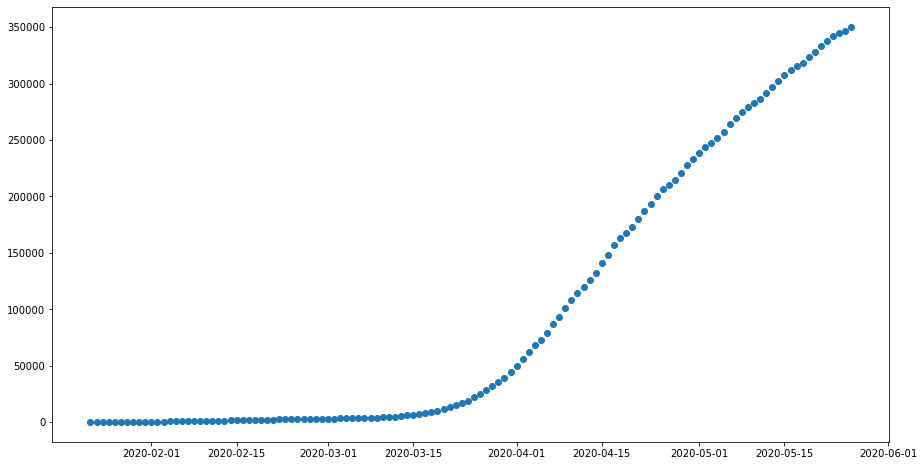

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(date['Date'],date['Deaths'])
plt.show()

### Death rate drastically increased world wide after March 2020.

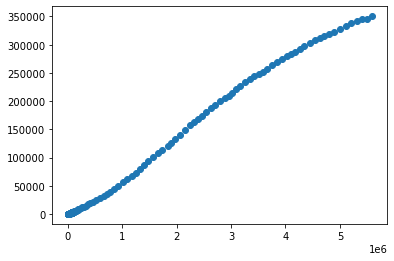

In [12]:
plt.scatter(date['Confirmed'],date['Deaths'])
plt.show()

### As confirmed cases increased world wide, death rate also increased drastically around the world.

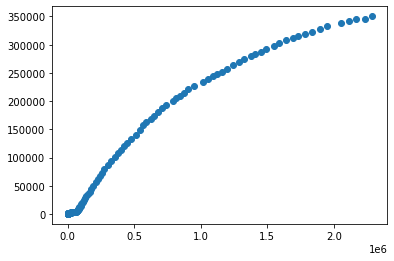

In [13]:
plt.scatter(date['Recovered'],date['Deaths'])
plt.show()

### Recovery rate didn't control death rate. Since confirmed cases were high both recovered cases and death cases remained high.

## Grouping Country

In [14]:
co=df.groupby('Country')['Confirmed','Recovered','Deaths'].sum().reset_index()
co

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,185236,20845,4669
1,Albania,41253,25688,1629
2,Algeria,240070,107345,23232
3,Andorra,41573,20751,2219
4,Angola,1892,506,131
...,...,...,...,...
183,West Bank and Gaza,19971,8798,113
184,Western Sahara,307,186,1
185,Yemen,2696,92,460
186,Zambia,15285,5281,215


In [15]:
co[['Country','Deaths']].sort_values('Deaths',ascending=False)[:10]

,Country,Deaths
174,US,3221969
85,Italy,1568276
178,United Kingdom,1329006
158,Spain,1302010
62,France,1209634
23,Brazil,438199
36,China,384657
16,Belgium,362702
81,Iran,352960
66,Germany,319666


### By June, These are the countries which recorded highest number of death cases.

In [16]:
co[['Country','Deaths']].sort_values('Deaths')[:10]

,Country,Deaths
150,Seychelles,0
56,Eritrea,0
116,Mongolia,0
60,Fiji,0
144,Saint Vincent and the Grenadines,0
69,Grenada,0
75,Holy See,0
169,Timor-Leste,0
30,Cambodia,0
143,Saint Lucia,0


### By June, These are the countries which recorded lowest number of death cases.

# Country Wise

## 1. India

In [17]:
co[co['Country']=='India']

,Country,Confirmed,Recovered,Deaths
79,India,2677040,903541,83979


### By June, India recorded:

###    - Confirmed-- 2677040 cases
###    - Recovered-- 903541 cases
###    - Deaths-- 83979 cases

In [18]:
ind=df[df['Country']=='India']
ind

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0
...,...,...,...,...,...
22827,2020-05-22,India,124794,51824,3726
23015,2020-05-23,India,131423,54385,3868
23203,2020-05-24,India,138536,57692,4024
23391,2020-05-25,India,144950,60706,4172


In [19]:
ind1=ind.groupby('Date')['Confirmed','Recovered','Deaths'].sum().reset_index()
ind1

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
121,2020-05-22,124794,51824,3726
122,2020-05-23,131423,54385,3868
123,2020-05-24,138536,57692,4024
124,2020-05-25,144950,60706,4172


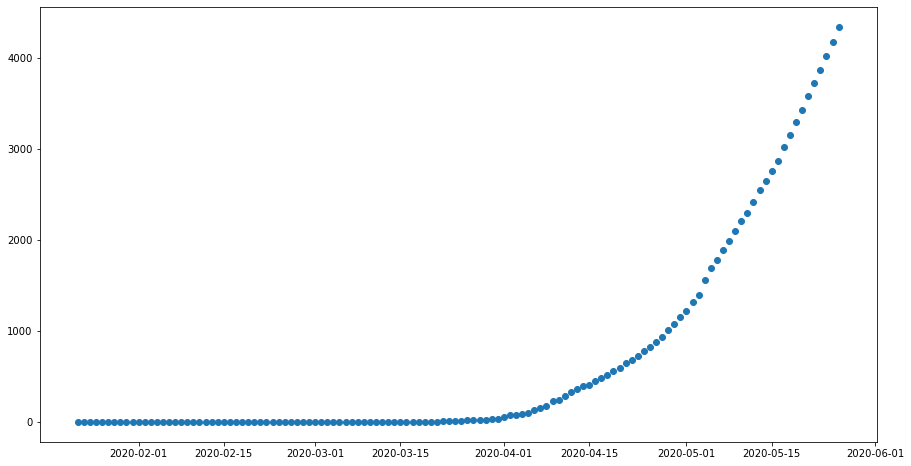

In [20]:
plt.figure(figsize=(15,8))
plt.scatter(ind1['Date'],ind1['Deaths'])
plt.show()

### In India death rate drastically increased from April 2020.

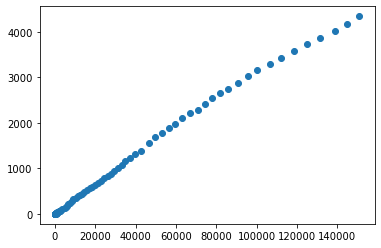

In [21]:
plt.scatter(ind1['Confirmed'],ind1['Deaths'])
plt.show()

### India recorded 4000+ death cases for 140000 confirmed cases.

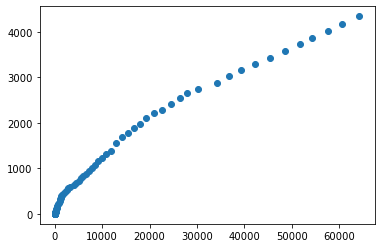

In [22]:
plt.scatter(ind1['Recovered'],ind1['Deaths'])
plt.show()

### As 60000 people recovered, 4000+ people died in India.

In [23]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


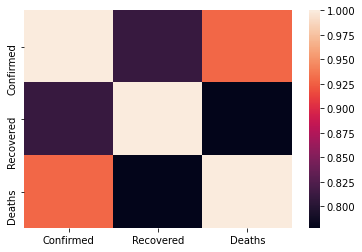

In [24]:
sns.heatmap(df.corr())
plt.show()

    Confirmed cases have 95% strong positive correlation with target column (Death cases).
    Recovered cases have 80% strong positive correlation with target column (Death cases).

### Since these two columns have strong correlation with the target variable and Date column is not necessary to predict death cases, we can drop Date column.

In [25]:
df.drop('Date',axis=1,inplace=True)

In [26]:
df

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,0,0,0
1,Albania,0,0,0
2,Algeria,0,0,0
3,Andorra,0,0,0
4,Angola,0,0,0
...,...,...,...,...
23683,West Bank and Gaza,429,365,3
23684,Western Sahara,9,6,1
23685,Yemen,249,10,49
23686,Zambia,920,336,7


# Data Preprocessing.

## Checking Outliers

Confirmed       AxesSubplot(0.125,0.125;0.227941x0.755)
Recovered    AxesSubplot(0.398529,0.125;0.227941x0.755)
Deaths       AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

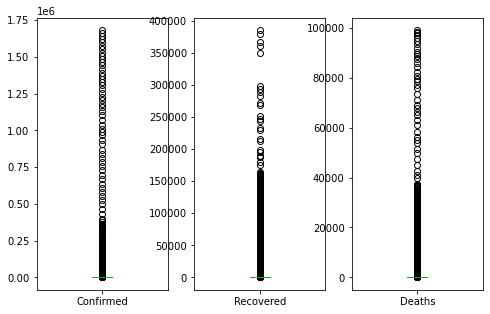

In [27]:
df.plot(kind='box',subplots=True,figsize=(8,5))

    Outliers exists.

## Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])

In [29]:
df.head()

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


## Removing Outliers

## 1. Z-score Method

In [30]:
from scipy.stats import zscore

z = np.abs(zscore(df))

In [31]:
# Threshold 3
cd = df[(z<3).all(axis=1)]

In [32]:
print(df.shape)
print(cd.shape)

(23688, 4)
(23177, 4)


In [33]:
# percentage loss of data
per_loss = ((23688-23177)/23688)*100
per_loss

2.157210401891253

###    Since significant amount of data is not lost after removing outliers, we can go ahead.

## Checking Skewness

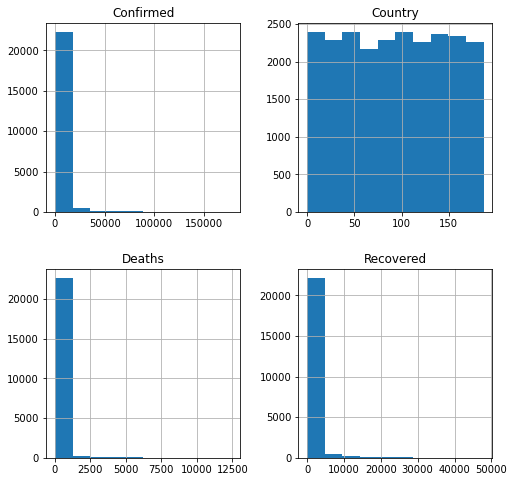

In [34]:
cd.hist(figsize=(8,8))
plt.show()

In [35]:
cd.skew()

Country     -0.005144
Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

### Acceptable range of skewness is +/- 0.6, hence data is skewed.

## Spliting Data

In [36]:
x=cd.drop('Deaths',axis=True)
x

,Country,Confirmed,Recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
23683,183,429,365
23684,184,9,6
23685,185,249,10
23686,186,920,336


In [37]:
y=cd['Deaths']
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

## Removing Skewness

In [38]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [39]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
# finding the best random_state

s=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    if mod_acc>s:
        s=mod_acc
        best_random_state=i
        
print(f" Best r2_score is {s*100} which is found on random_state {best_random_state}")

 Best r2_score is 10.311441088730323 which is found on random_state 692


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_random_state)

In [43]:
# finding the best cv

cv=-1000
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on cv = {best_cv}")

 Best Cross_val_score is -140.38693082335024 which is found on cv = 4


# Finding the Best Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [45]:
mod_list = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),SVR(),
            KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
            GradientBoostingRegressor(),SGDRegressor()]

In [46]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    print('r2_score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('Cross_val_score:',cv_score*100)
    print('Difference:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print('Error')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean squared error:',mean_squared_error(y_test,y_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')    

LinearRegression()
r2_score: 10.311441088730323
Cross_val_score: -140.38693082335024
Difference: 150.69837191208057
Training score: 8.787529724725507
Error
Mean absolute error: 232.15649356231762
Mean squared error: 366865.65262637625
Root mean squared error: 605.6943557821686


Lasso()
r2_score: 10.311706971210233
Cross_val_score: -136.45650271127408
Difference: 146.76820968248433
Training score: 8.787099394489594
Error
Mean absolute error: 231.49830445906153
Mean squared error: 366864.56505009346
Root mean squared error: 605.693457988522


Ridge()
r2_score: 10.311442764856126
Cross_val_score: -140.31777781073114
Difference: 150.62922057558728
Training score: 8.78752960648388
Error
Mean absolute error: 232.14540324095313
Mean squared error: 366865.6457702845
Root mean squared error: 605.6943501224727


ElasticNet()
r2_score: 9.662489565088661
Cross_val_score: -17.418671333141532
Difference: 27.081160898230195
Training score: 8.278712394529586
Error
Mean absolute error: 198.74236279501

### From above it is clear that models such as Random Forest Regressor and K Neighbors Regressor are  performing better.
### Let's select Random Forest Regressor for hyper-parameter tuning.

In [47]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(rfr,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference:',(mod_acc*100)-(cv_score*100))
print('Training score:',rfr.score(x_train,y_train)*100)
print('Error')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')

r2_score: 97.05551429869878
Cross_val_score: 35.25856635126159
Difference: 61.79694794743719
Training score: 99.44974772524434
Error
Mean absolute error: 15.867237606260577
Mean squared error: 12044.241557338368
Root mean squared error: 109.74625987858705




## Hyper-parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

parameters={
    'n_estimators':[100,150],
    'max_features':['auto','sqrt','log2']
}

In [49]:
gscv = GridSearchCV(rfr,parameters,scoring='r2',cv=best_cv)

gscv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]},
             scoring='r2')

In [50]:
gscv.best_params_

{'max_features': 'auto', 'n_estimators': 150}

In [51]:
rfr_gs=RandomForestRegressor(n_estimators=150,max_features='auto')
rfr_gs.fit(x_train,y_train)
y_pred=rfr_gs.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(rfr_gs,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference:',(mod_acc*100)-(cv_score*100))
print('Training score:',rfr_gs.score(x_train,y_train)*100)
print('Error')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')

r2_score: 97.13417451933493
Cross_val_score: 36.08918288526628
Difference: 61.04499163406865
Training score: 99.460389302073
Error
Mean absolute error: 15.96083257643011
Mean squared error: 11722.486658723417
Root mean squared error: 108.27043298483395




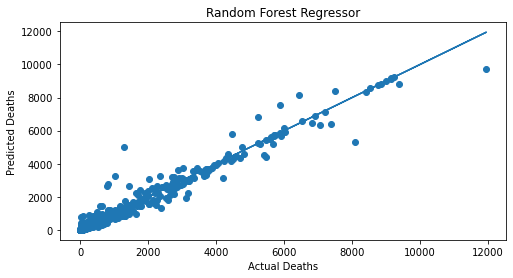

In [52]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)
plt.title('Random Forest Regressor')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.show()

## Conclusion

In [53]:
df1=pd.DataFrame({'Actual Deaths':y_test, 'Predicted Deaths':y_pred})
df1

,Actual Deaths,Predicted Deaths
5937,0,0.000000
18733,0,0.073333
14585,7,3.050000
17042,3929,3910.680000
6939,0,0.000000
...,...,...
6918,0,0.000000
5795,0,0.000000
19394,0,0.000000
15429,39,30.173333


### From above table it is clear that model is performing better.

In [54]:
import joblib

joblib.dump(rfr_gs,'Covid19-Model.obj')

['Covid19-Model.obj']